In [ ]:
#примеры: бином, t test, z test, chi square, Mann-Whetney

# Подбросили монету 100 раз, орел выпал 65. Нормальна ли монета?

In [14]:
#Z test
#так как мы знаем СКО ген совокупности то можно применить z test
import math
X_bar = 0.65
mean = 0.5
len = 100
p = 0.5
z = (X_bar - mean) / math.sqrt(p*(1-p) /len)
p_value = 1 - scipy.stats.norm.cdf(z)
p_value*2

0.002699796063260207

In [15]:
#Binomial test
import scipy
scipy.stats.binom_test(65, n=100, p=0.5, alternative='two-sided') #отклоняем Н0

0.0035176417229701613

In [18]:
#мы можем сказать что распр бернулли близко к норм по ЦПТ
import math
X_bar = 65-0.5 #continuity correction
mean = 50
len = 100
p = 0.5
z = (X_bar - mean) / math.sqrt(p*(1-p)*len)
p_value = 1 - scipy.stats.norm.cdf(z)
p_value*2

0.00373162660076809

# A/B testing: 20 из 1000 против 30 из 900

In [25]:
#t test for two population
n1 = 1000
n2= 900
click1 = 20
click2 = 30
x1 = click1/n1
x2 = click2/n2
p1 = x1
p2 = x2
SE = math.sqrt( p1*(1-p1)/n1 + p2*(1-p2)/n2 )
t = abs(x1 - x2) / SE
p_value = 1 - scipy.stats.t.cdf(t, df = min(n1 -1, n2 -1) )
p_value * 2

0.07357757805716392

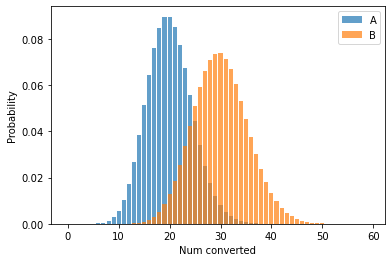

In [28]:
#смоделируем бином распределение
%matplotlib inline
import matplotlib.pyplot as plt
from scipy.stats import binom
import numpy as np

num_a, num_b = 1000, 900
click_a, click_b = 20, 30
rate_a, rate_b = click_a / num_a, click_b / num_b

# Determine the probability of having x number of click throughs
clicks = np.arange(0, 60)
prob_a = binom(num_a, rate_a).pmf(clicks)
prob_b = binom(num_b, rate_b).pmf(clicks)

# Make the bar plots.
plt.bar(clicks, prob_a, label="A", alpha=0.7)
plt.bar(clicks, prob_b, label="B", alpha=0.7)
plt.legend()
plt.xlabel("Num converted"); plt.ylabel("Probability");

Text(0, 0.5, 'Probability')

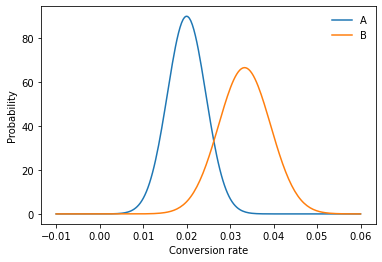

In [37]:
#по ЦПТ перейдем к норм распределению
from scipy.stats import norm

# Where does this come from? See the link above.
#std_a = np.sqrt(rate_a * (1 - rate_a) / num_a)
#std_b = np.sqrt(rate_b * (1 - rate_b) / num_b)

click_rate = np.linspace(-0.01, 0.06, 200)
prob_a = norm(rate_a, std_a).pdf(click_rate)
prob_b = norm(rate_b, std_b).pdf(click_rate)

# Make the bar plots.
plt.plot(click_rate, prob_a, label="A")
plt.plot(click_rate, prob_b, label="B")
plt.legend(frameon=False)
plt.xlabel("Conversion rate")
plt.ylabel("Probability")

In [42]:
#z one-tailed test
z_score = (rate_b - rate_a) / np.sqrt(std_a**2 + std_b**2)
p = norm(rate_b - rate_a, np.sqrt(std_a**2 + std_b**2))
print(f"zscore is {z_score:0.3f}, with p-value {norm().sf(z_score):0.5f}")

zscore is 1.791, with p-value 0.03662


In [72]:
# Симулируем проверку
n = 1000
rates_a = norm(rate_a, std_a).rvs(n)
rates_b = norm(rate_b, std_b).rvs(n)
b_better = (rates_b > rates_a).sum() / n
print(f"B is better than A {b_better * 100:0.1f}% of the time")

B is better than A 96.3% of the time


In [49]:
#Welsch’s t-test
from scipy.stats import ttest_ind
a_dist = np.zeros(num_a)
a_dist[:click_a] = 1
b_dist = np.zeros(num_b)
b_dist[:click_b] = 1
zscore, prob = ttest_ind(a_dist, b_dist, equal_var=False)
print(f"Zscore is {zscore:0.2f}, p-value is {prob:0.3f} (two tailed), {prob/2:0.3f} (one tailed)")

Zscore is -1.79, p-value is 0.074 (two tailed), 0.037 (one tailed)


In [50]:
#A better option for discrete data is the Mann-Whitney U statistic
from scipy.stats import mannwhitneyu
stat, p_value = mannwhitneyu(a_dist, b_dist, alternative="less") #B > A
print(f"Mann-Whitney U test for null hypothesis B <= A is {p_value:0.3f}")

Mann-Whitney U test for null hypothesis B <= A is 0.035


In [67]:
#можем рассмотреть задачу как категор данные и применить Хи квадрат
#применимо когда больше 2 выборок
#        Clicks |NonClicks |Impressions
#Ad 1   |20     |980       |1000        
#Ad 2   |30     |870       |900         

stat, p, dof, expected = scipy.stats.chi2_contingency([[20,980],[30,870]],correction=False)
p

0.06985234871449345